# Brazil COVID-19 Hospital
## We are going to analyse the data and oredict the output into 2 task
### Task 1 : Predicting the confirmed cases among suspected cases of COVID-19
### Task 2 : Predicting the admission to general ward, semi-intensive unit & inntensive care unit among confirmed COVID-19

##### Before starting, we have to simport some important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot
import plotly.express as px
import plotly.offline as py
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Brazil_COVID-19_Hospital.csv", header=0, encoding="unicode_escape")
df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0            NaN        NaN                    NaN  ...   
1      -0.022340  -0.517413               0.010677  ...   
2            NaN        NaN                    NaN  ...   
3            NaN        NaN                    NaN  ...   
4            NaN        NaN                    NaN  ...   
...          ...        ...                    ...  ...   
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643    0.541564  -0.906829              -0.325903  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                                     

##### we are added some encoding method, because there was a problem in uploading a dataset (utf-8 codec can't decode).

In [3]:
df.shape

(5644, 111)

In [4]:
df.columns.values

array(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Mycoplasma pneumoniae', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella p

#### We can see above all columns name & details

In [5]:
df.describe().T

count          mean  \
Patient age quantile                                5644.0  9.318391e+00   
Patient addmited to regular ward (1=yes, 0=no)      5644.0  1.399717e-02   
Patient addmited to semi-intensive unit (1=yes,...  5644.0  8.858965e-03   
Patient addmited to intensive care unit (1=yes,...  5644.0  7.264352e-03   
Hematocrit                                           603.0 -2.187396e-09   
...                                                    ...           ...   
HCO3 (arterial blood gas analysis)                    27.0  6.000000e-09   
pO2 (arterial blood gas analysis)                     27.0 -2.481481e-08   
Arteiral Fio2                                         20.0  4.650000e-09   
Phosphor                                              20.0  6.250000e-09   
ctO2 (arterial blood gas analysis)                    27.0  5.185185e-09   

                                                         std       min  \
Patient age quantile                                5.777903  0.000000   
Patient addmited to regular ward (1=yes, 0=no)      0.117489  0.000000   
Patient addmited to semi-intensive unit (1=yes,...  0.093713  0.000000   
Patient addmited to intensive care unit (1=yes,...  0.084929  0.000000   
Hematocrit                                          1.000830 -4.501420   
...                                                      ...       ...   
HCO3 (arterial blood gas analysis)                  1.019049 -2.985592   
pO2 (arterial blood gas analysis)                   1.019049 -1.175907   
Arteiral Fio2                                       1.025978 -1.532932   
Phosphor                                            1.025978 -1.480526   
ctO2 (arterial blood gas analysis)                  1.019049 -2.900254   

                                                         25%       50%  \
Patient age quantile                                4.000000  9.000000   
Patient addmited to regular ward (1=yes, 0=no)      0.000000  0.000000   
Patient addmited to semi-intensive unit (1=yes,...  0.000000  0.000000   
Patient addmited to intensive care unit (1=yes,...  0.000000  0.000000   
Hematocrit                                         -0.518807  0.053407   
...                                                      ...       ...   
HCO3 (arterial blood gas analysis)                 -0.539721  0.056332   
pO2 (arterial blood gas analysis)                  -0.816990 -0.159955   
Arteiral Fio2                                      -0.121498 -0.011744   
Phosphor                                           -0.552730 -0.138182   
ctO2 (arterial blood gas analysis)                 -0.485279  0.182693   

                                                          75%        max  
Patient age quantile                                14.000000  19.000000  
Patient addmited to regular ward (1=yes, 0=no)       0.000000   1.000000  
Patient addmited to semi-intensive unit (1=yes,...   0.000000   1.000000  
Patient addmited to intensive care unit (1=yes,...   0.000000   1.000000  
Hematocrit                                           0.717175   2.662704  
...                                                       ...        ...  
HCO3 (arterial blood gas analysis)                   0.508510   2.029471  
pO2 (arterial blood gas analysis)                    0.450009   2.205371  
Arteiral Fio2                                       -0.011744   2.841856  
Phosphor                                             0.276365   2.862350  
ctO2 (arterial blood gas analysis)                   0.593753   1.826932  

[74 rows x 8 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [7]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [8]:
df.columns = [x.lower().strip().replace(" ","_") for x in df.columns]

In [9]:
df.columns.values

array(['patient_id', 'patient_age_quantile', 'sars-cov-2_exam_result',
       'patient_addmited_to_regular_ward_(1=yes,_0=no)',
       'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
       'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)',
       'hematocrit', 'hemoglobin', 'platelets', 'mean_platelet_volume',
       'red_blood_cells', 'lymphocytes',
       'mean_corpuscular_hemoglobin_concentration\xa0(mchc)',
       'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_(mch)',
       'eosinophils', 'mean_corpuscular_volume_(mcv)', 'monocytes',
       'red_blood_cell_distribution_width_(rdw)', 'serum_glucose',
       'respiratory_syncytial_virus', 'influenza_a', 'influenza_b',
       'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus',
       'mycoplasma_pneumoniae', 'coronavirus_hku1', 'parainfluenza_3',
       'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4',
       'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009',
       'bordetella_pe

In [10]:
df.head()

patient_id  patient_age_quantile sars-cov-2_exam_result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   patient_addmited_to_regular_ward_(1=yes,_0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   hemoglobin  platelets  mean_platelet_volume  ...  \
0         NaN        NaN                   NaN  ...   
1    -0.02234  -0.517413              0.010677  ...   
2         NaN        NaN                   NaN  ...   
3         NaN        NaN                   NaN  ...   
4         NaN        NaN                   NaN  ...   

   hb_saturation_(arterial_blood_gases)  pco2_(arterial_blood_gas_analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   base_excess_(arterial_blood_gas_analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   ph_(arterial_blood_gas_analysis)  total_co2_(arterial_blood_gas_analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   hco3_(arterial_blood_gas_analysis)  po2_(arterial_blood_gas_analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   arteiral_fio2  phosphor  cto2_(arterial_blood_gas_analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

### Transforming the target varibale into numeric

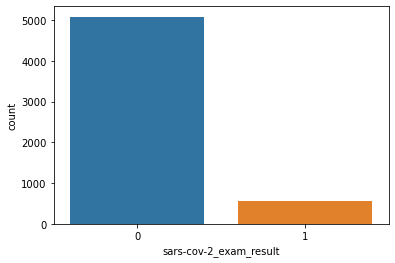

In [11]:
df["sars-cov-2_exam_result"] = df["sars-cov-2_exam_result"].replace(["negative", "positive"], [0,1])
sns.countplot(df["sars-cov-2_exam_result"])

In [12]:
print("There {}% target values with 1". format(100 * df["sars-cov-2_exam_result"].value_counts()[1]/df.shape[0]))

There 9.886605244507441% target values with 1


## Now we are going to search for NUll values / missing values in each column

In [13]:
def missing_data(data):
    total = data.isnull().sum()
    percent =(data.isnull().sum() / data.isnull().count()*100)
    tt = pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
    types = []
    for col in df.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt["Types"] = types
    return(np.transpose(tt))

In [14]:
missing_data(df)

patient_id patient_age_quantile sars-cov-2_exam_result  \
Total            0                    0                      0   
Percent          0                    0                      0   
Types       object                int64                  int64   

        patient_addmited_to_regular_ward_(1=yes,_0=no)  \
Total                                                0   
Percent                                              0   
Types                                            int64   

        patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
Total                                                    0      
Percent                                                  0      
Types                                                int64      

        patient_addmited_to_intensive_care_unit_(1=yes,_0=no) hematocrit  \
Total                                                    0          5041   
Percent                                                  0       89.3161   
Types                                                int64       float64   

        hemoglobin platelets mean_platelet_volume  ...  \
Total         5041      5042                 5045  ...   
Percent    89.3161   89.3338               89.387  ...   
Types      float64   float64              float64  ...   

        hb_saturation_(arterial_blood_gases)  \
Total                                   5617   
Percent                              99.5216   
Types                                float64   

        pco2_(arterial_blood_gas_analysis)  \
Total                                 5617   
Percent                            99.5216   
Types                              float64   

        base_excess_(arterial_blood_gas_analysis)  \
Total                                        5617   
Percent                                   99.5216   
Types                                     float64   

        ph_(arterial_blood_gas_analysis)  \
Total                               5617   
Percent                          99.5216   
Types                            float64   

        total_co2_(arterial_blood_gas_analysis)  \
Total                                      5617   
Percent                                 99.5216   
Types                                   float64   

        hco3_(arterial_blood_gas_analysis) po2_(arterial_blood_gas_analysis)  \
Total                                 5617                              5617   
Percent                            99.5216                           99.5216   
Types                              float64                           float64   

        arteiral_fio2 phosphor cto2_(arterial_blood_gas_analysis)  
Total            5624     5624                               5617  
Percent       99.6456  99.6456                            99.5216  
Types         float64  float64                            float64  

[3 rows x 111 columns]

### Treating Missing values

##### We are to going to use Nullity matrix which is a data dense display.From whcih we can easily visually analyse the data

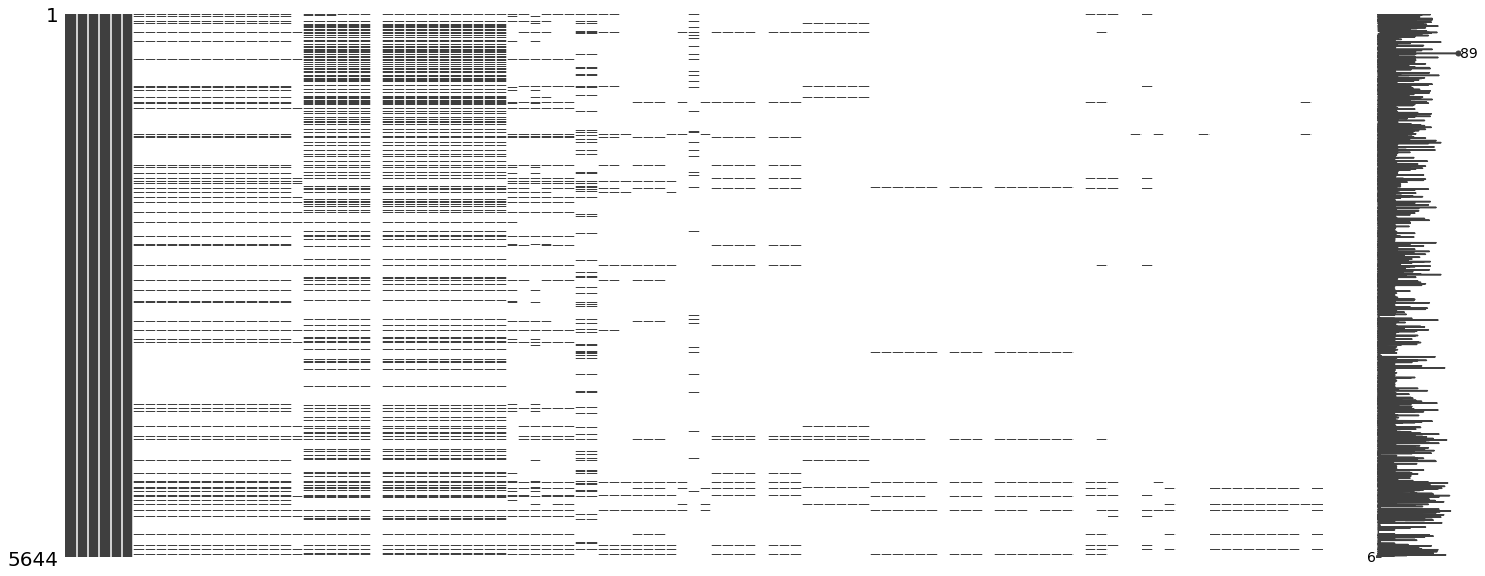

In [15]:
import missingno as msno
msno.matrix(df)

##### Now we are going to plot heatmap with missingno, we can easily understand the correlation between presence or absence of one variable affects the presence of another

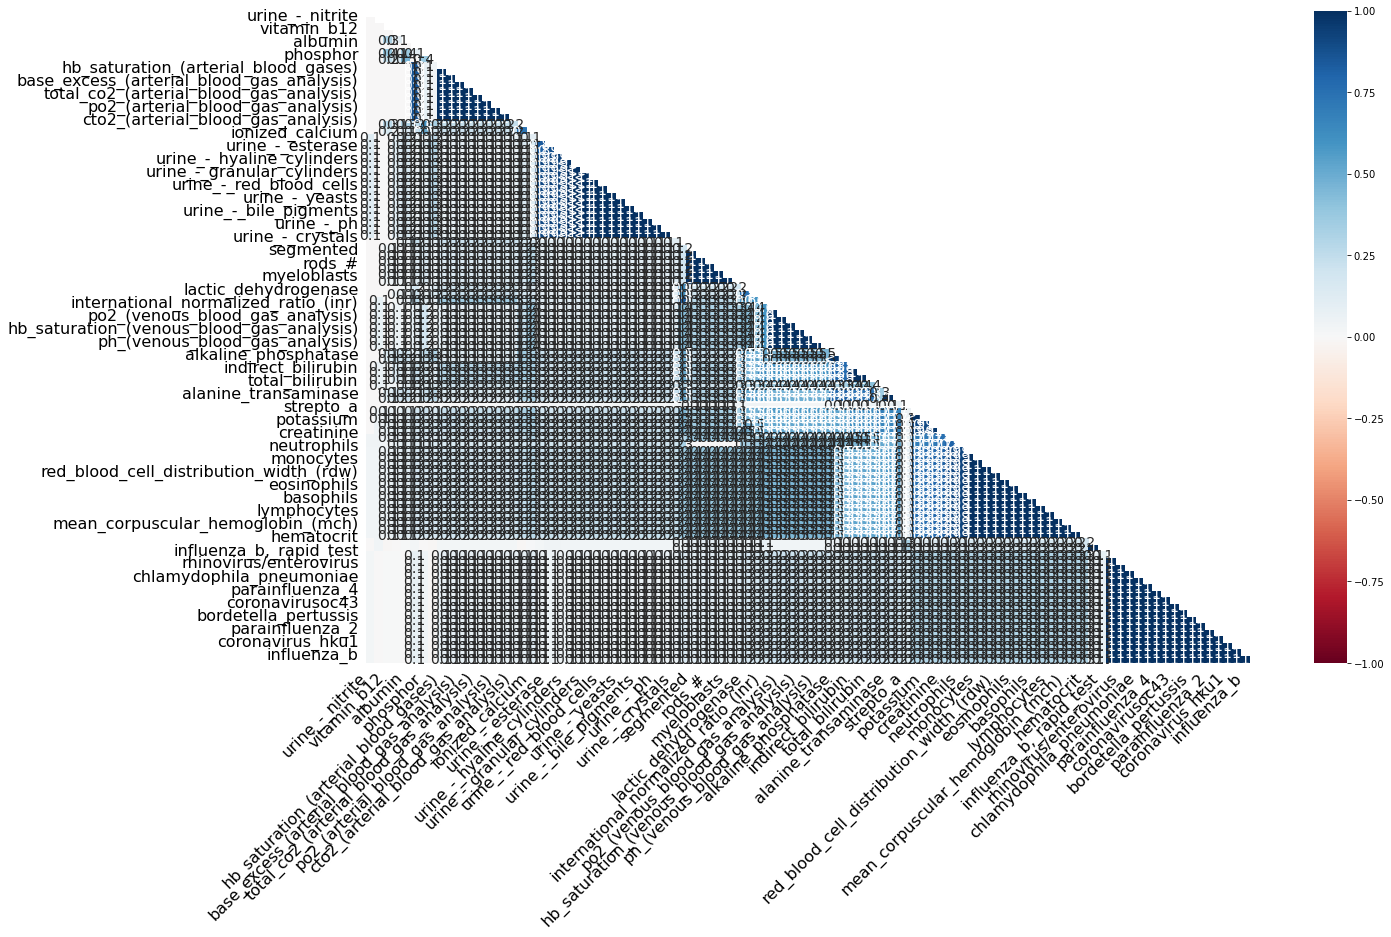

In [16]:
a = msno.heatmap(df, sort="ascending")
a

##### We are ploting dendogram to more understand the correlation revealing ternds deeper than the pairwise ones visible in the correlation heatmap

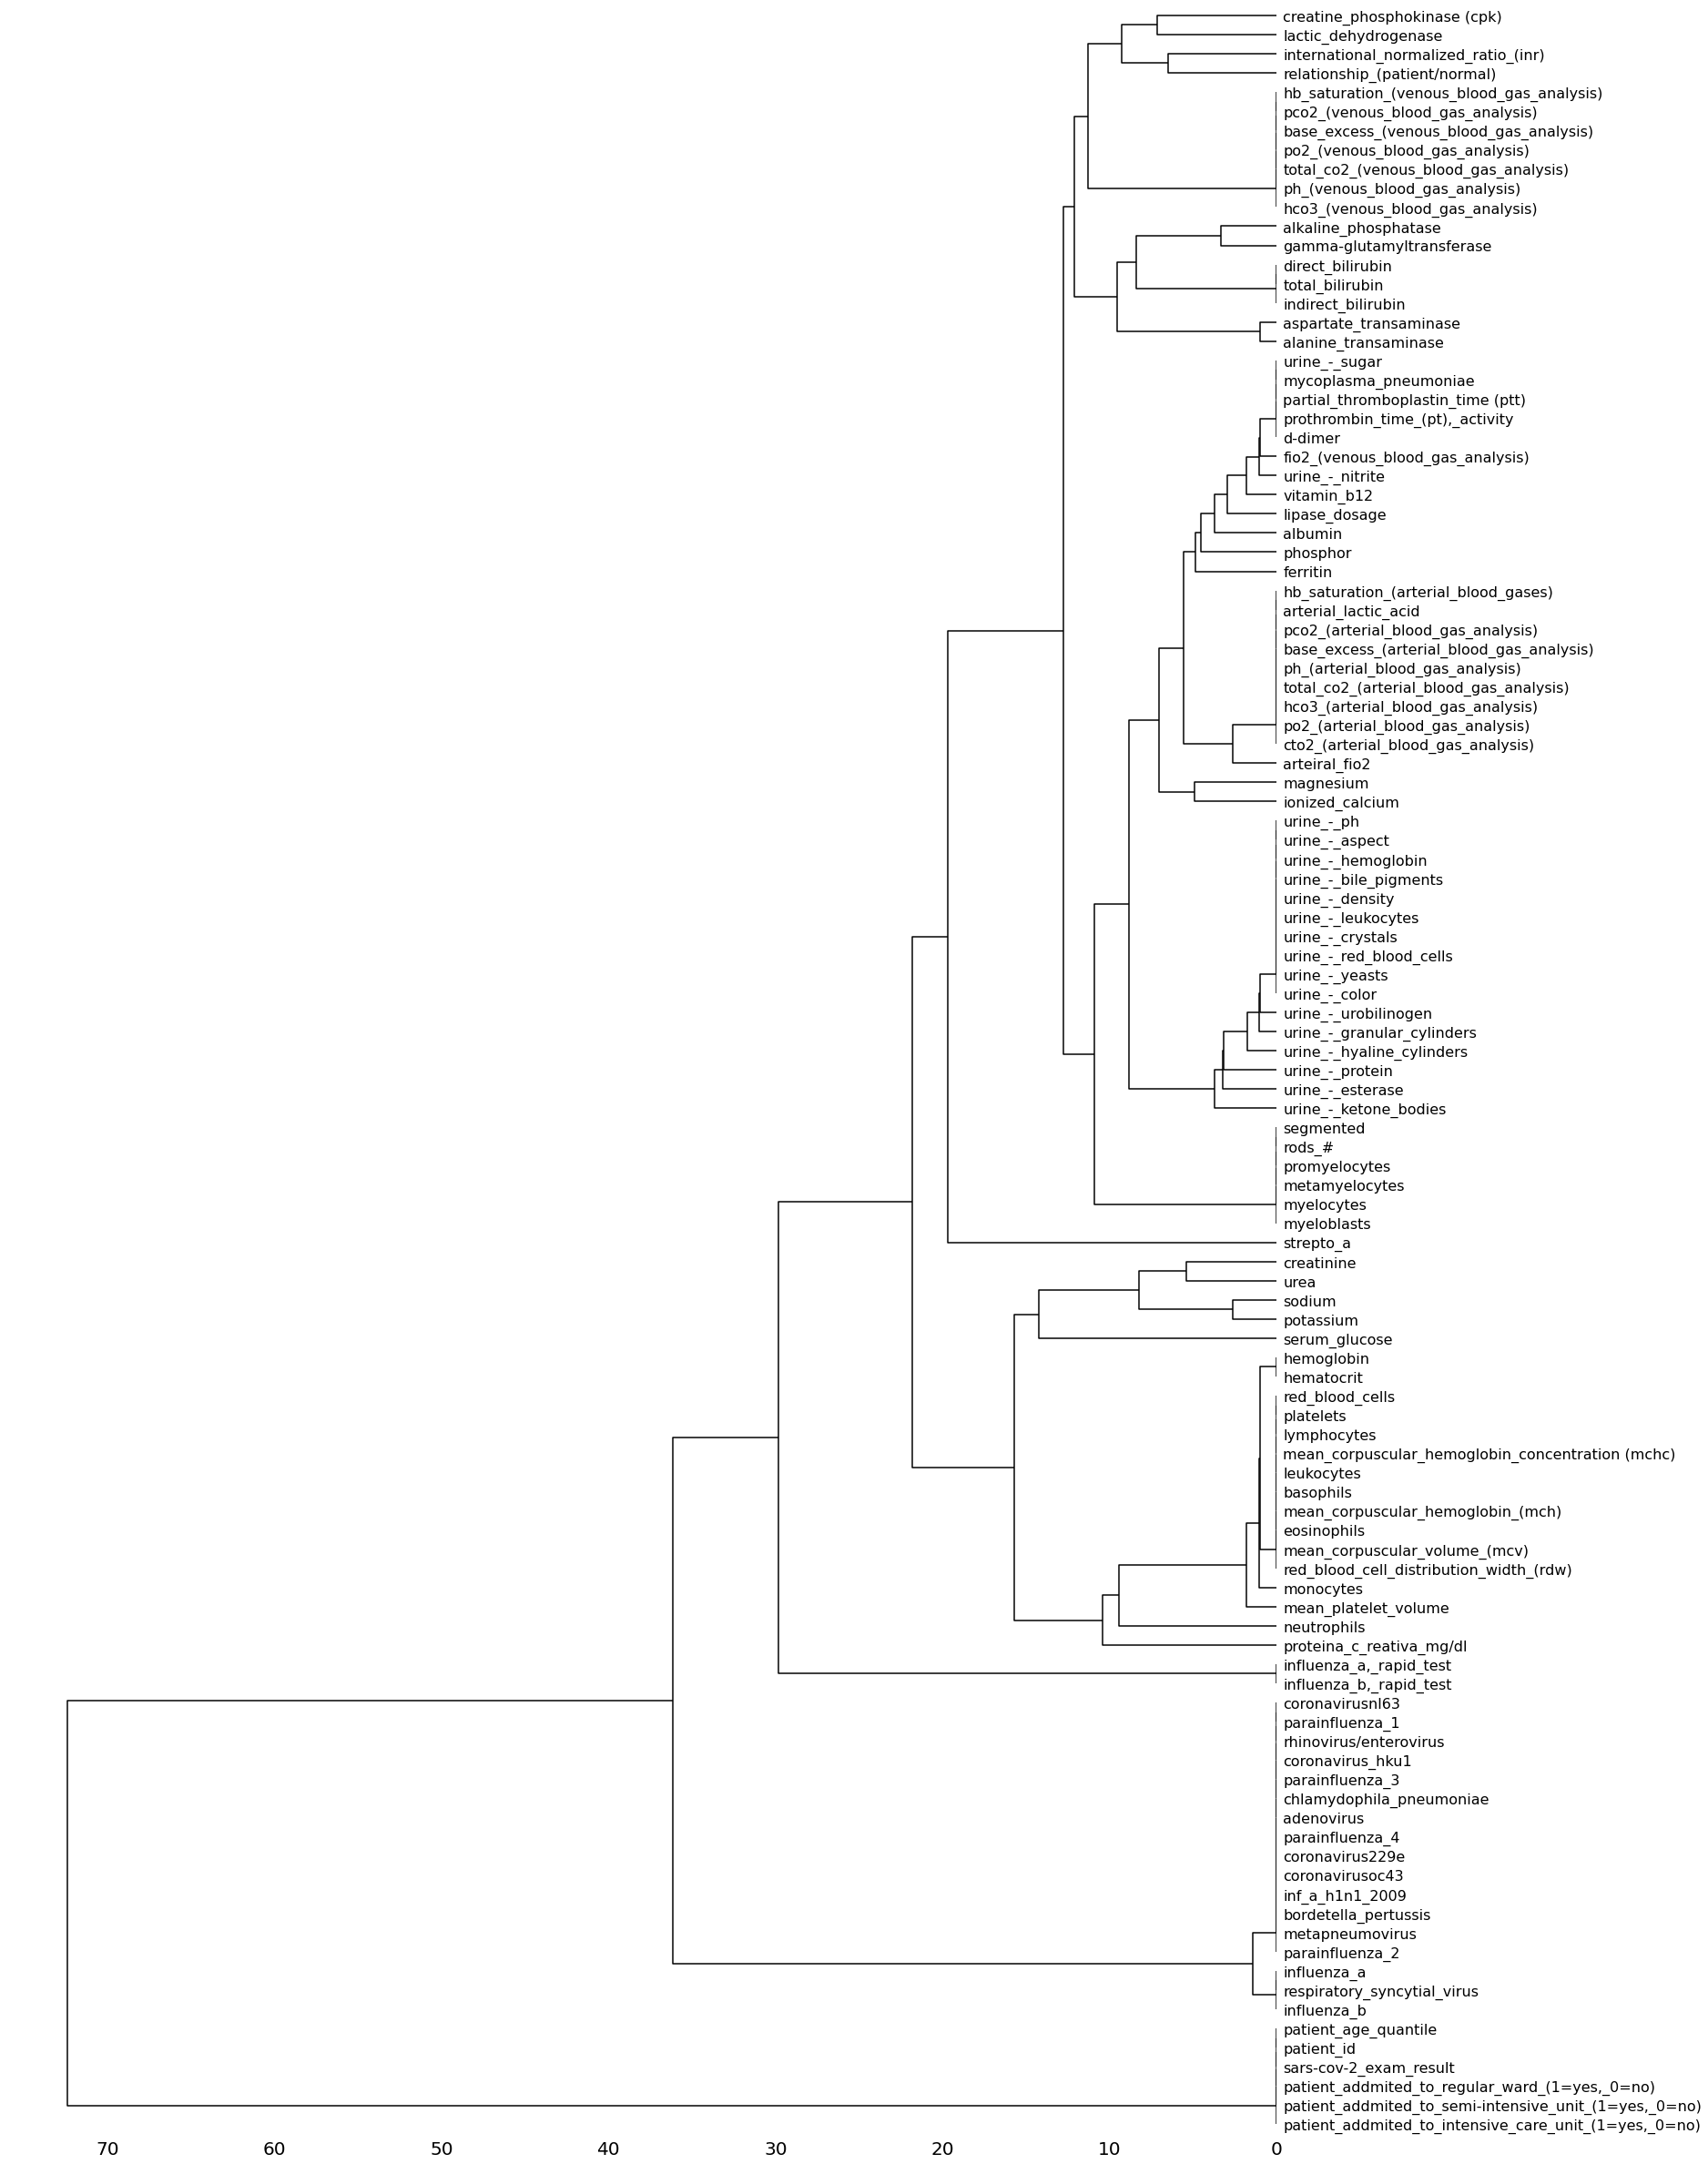

In [17]:
a2 = msno.dendrogram(df)
a2

### Columns datatypes
##### int64 & float64 are numeric but is it discrete or continous, 
##### object columns contain string & categorical 

In [18]:
df.dtypes.value_counts()

float64    70
object     36
int64       5
dtype: int64

##### we will search for unique classes in each object

In [19]:
df.select_dtypes("object").apply(pd.Series.nunique, axis =0)

patient_id                     5644
respiratory_syncytial_virus       2
influenza_a                       2
influenza_b                       2
parainfluenza_1                   2
coronavirusnl63                   2
rhinovirus/enterovirus            2
coronavirus_hku1                  2
parainfluenza_3                   2
chlamydophila_pneumoniae          2
adenovirus                        2
parainfluenza_4                   2
coronavirus229e                   2
coronavirusoc43                   2
inf_a_h1n1_2009                   2
bordetella_pertussis              2
metapneumovirus                   2
parainfluenza_2                   1
influenza_b,_rapid_test           2
influenza_a,_rapid_test           2
strepto_a                         3
urine_-_esterase                  2
urine_-_aspect                    4
urine_-_ph                       11
urine_-_hemoglobin                3
urine_-_bile_pigments             2
urine_-_ketone_bodies             2
urine_-_nitrite             

##### Now we are going to findout correlation between the target and other features

In [20]:
correlations = df.corr()["sars-cov-2_exam_result"].sort_values()

print("Most Positive Correlations: \n", correlations.tail(10))
print("\nMost Negative Correlations: \n", correlations.head(10))

Most Positive Correlations: 
 sars-cov-2_exam_result               1.0
mycoplasma_pneumoniae                NaN
fio2_(venous_blood_gas_analysis)     NaN
myeloblasts                          NaN
urine_-_sugar                        NaN
partial_thromboplastin_time (ptt)    NaN
prothrombin_time_(pt),_activity      NaN
vitamin_b12                          NaN
d-dimer                              NaN
albumin                              NaN
Name: sars-cov-2_exam_result, dtype: float64

Most Negative Correlations: 
 pco2_(arterial_blood_gas_analysis)        -0.323977
arteiral_fio2                             -0.310583
ionized_calcium                           -0.305113
leukocytes                                -0.288508
platelets                                 -0.282268
total_co2_(arterial_blood_gas_analysis)   -0.249422
hco3_(arterial_blood_gas_analysis)        -0.213858
eosinophils                               -0.192609
urine_-_density                           -0.180874
indirect_bilirub

##### From above we cann say that, the first 10 have the least correlated features
##### Now we will see the correlation between feaures

In [21]:
features = df.columns.values[2:112]
corrs = df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs =  corrs[corrs["level_0"] != corrs["level_1"]]
corrs.head(20)

level_0  \
0                             promyelocytes   
1        pco2_(arterial_blood_gas_analysis)   
2        hco3_(arterial_blood_gas_analysis)   
3                             promyelocytes   
4                             promyelocytes   
5                 gamma-glutamyltransferase   
6              creatine_phosphokinase (cpk)   
7              creatine_phosphokinase (cpk)   
8                            metamyelocytes   
9                                myelocytes   
10                  urine_-_red_blood_cells   
11                            promyelocytes   
12                                magnesium   
13                            promyelocytes   
14                            promyelocytes   
15  total_co2_(arterial_blood_gas_analysis)   
16                            promyelocytes   
17     international_normalized_ratio_(inr)   
18                            promyelocytes   
19                     arterial_lactic_acid   

                                    level_1             0  
0        hco3_(arterial_blood_gas_analysis)  0.000000e+00  
1                             promyelocytes  0.000000e+00  
2                             promyelocytes  0.000000e+00  
3        pco2_(arterial_blood_gas_analysis)  0.000000e+00  
4                 gamma-glutamyltransferase  6.672182e-18  
5                             promyelocytes  6.672182e-18  
6                            metamyelocytes  8.744900e-18  
7                                myelocytes  8.744900e-18  
8              creatine_phosphokinase (cpk)  8.744900e-18  
9              creatine_phosphokinase (cpk)  8.744900e-18  
10                            promyelocytes  8.764855e-18  
11                  urine_-_red_blood_cells  8.764855e-18  
12                            promyelocytes  1.755254e-17  
13                                magnesium  1.755254e-17  
14  total_co2_(arterial_blood_gas_analysis)  2.064581e-17  
15                            promyelocytes  2.064581e-17  
16     international_normalized_ratio_(inr)  2.255338e-17  
17                            promyelocytes  2.255338e-17  
18                     arterial_lactic_acid  2.280813e-17  
19                            promyelocytes  2.280813e-17

## Clustermap for correlation

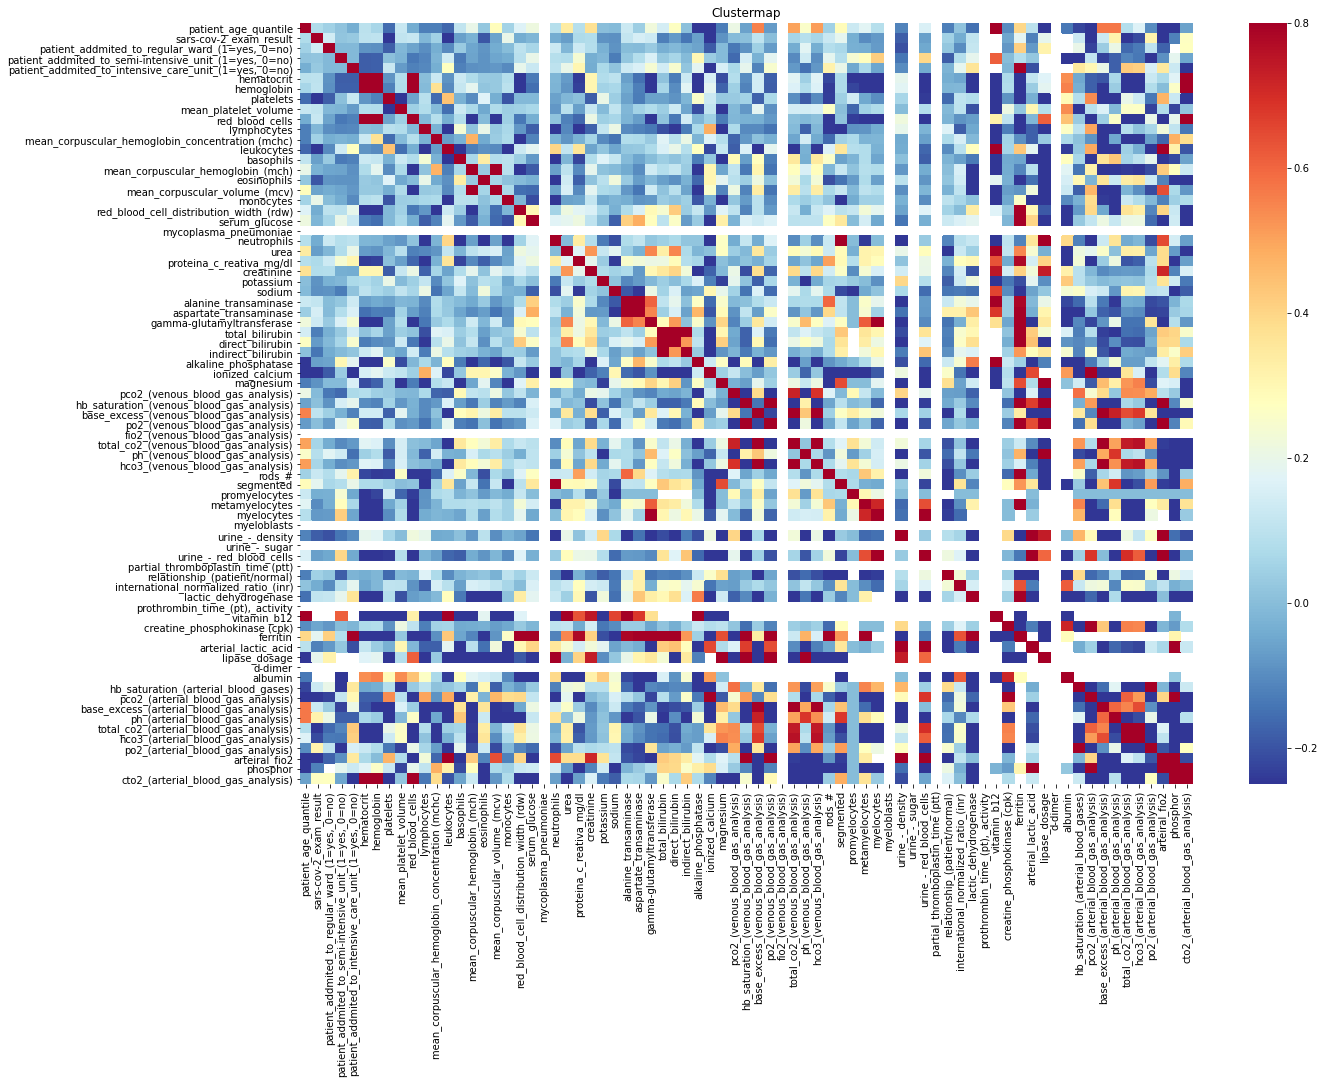

In [22]:
corrs1 = df.corr()
plt.figure(figsize= (20,14))
sns.heatmap(corrs1, cmap=plt.cm.RdYlBu_r,vmin = -0.25, annot=False, vmax=0.8)
plt.title("Clustermap");

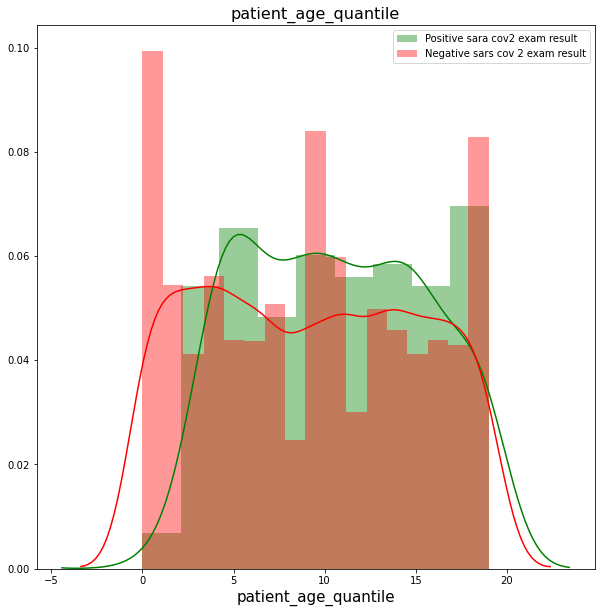

In [23]:
def plot_dist_col(column):
    pos__df = df[df["sars-cov-2_exam_result"] == 1]
    neg__df = df[df["sars-cov-2_exam_result"] == 0]
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.distplot(pos__df[column].dropna(), color="green", ax=ax).set_title(column, fontsize=16)
    sns.distplot(neg__df[column].dropna(), color="red", ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(["Positive sara cov2 exam result", "Negative sars cov 2 exam result"])
    plt.show()
plot_dist_col("patient_age_quantile")

In [24]:
fig = px.pie(values=df.groupby(["sars-cov-2_exam_result"]).size().values, names=df.groupby(["sars-cov-2_exam_result"]).size().index)
fig.update_layout( font=dict(size=15, color="#FEE000"))
py.iplot(fig)

### We are using Label encoder for converting categorical values to numerical values

In [25]:
from sklearn.preprocessing import LabelEncoder

for c in df.columns:
    if df[c].dtype == "float16" or df[c].dtype =="float32" or df[c].dtype == "float64":
        df[c].fillna(df[c].mean())
        
        
df= df.fillna(-999)

for f in df.columns:
    if df[f].dtypes == "object":
        l_e = LabelEncoder()
        l_e.fit(list(df[f].values))
        df[f] = l_e.transform(list(df[f].values))

## Feature Selection

##### First we are going to use collinear method from which we can find the highly correlated variables with one another

##### we are setting Threshold (0.92) for removing correlated variables

In [26]:
threshold = 0.92

corr_matrix = df.corr().abs()
corr_matrix.head()

patient_id  \
patient_id                                            1.000000   
patient_age_quantile                                  0.014136   
sars-cov-2_exam_result                                0.018664   
patient_addmited_to_regular_ward_(1=yes,_0=no)        0.003748   
patient_addmited_to_semi-intensive_unit_(1=yes,...    0.004803   

                                                    patient_age_quantile  \
patient_id                                                      0.014136   
patient_age_quantile                                            1.000000   
sars-cov-2_exam_result                                          0.075244   
patient_addmited_to_regular_ward_(1=yes,_0=no)                  0.046166   
patient_addmited_to_semi-intensive_unit_(1=yes,...              0.015736   

                                                    sars-cov-2_exam_result  \
patient_id                                                        0.018664   
patient_age_quantile                                              0.075244   
sars-cov-2_exam_result                                            1.000000   
patient_addmited_to_regular_ward_(1=yes,_0=no)                    0.142437   
patient_addmited_to_semi-intensive_unit_(1=yes,...                0.019364   

                                                    patient_addmited_to_regular_ward_(1=yes,_0=no)  \
patient_id                                                                                0.003748   
patient_age_quantile                                                                      0.046166   
sars-cov-2_exam_result                                                                    0.142437   
patient_addmited_to_regular_ward_(1=yes,_0=no)                                            1.000000   
patient_addmited_to_semi-intensive_unit_(1=yes,...                                        0.011264   

                                                    patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
patient_id                                                                                   0.004803       
patient_age_quantile                                                                         0.015736       
sars-cov-2_exam_result                                                                       0.019364       
patient_addmited_to_regular_ward_(1=yes,_0=no)                                               0.011264       
patient_addmited_to_semi-intensive_unit_(1=yes,...                                           1.000000       

                                                    patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  \
patient_id                                                                                   0.000162       
patient_age_quantile                                                                         0.035772       
sars-cov-2_exam_result                                                                       0.027586       
patient_addmited_to_regular_ward_(1=yes,_0=no)                                               0.010192       
patient_addmited_to_semi-intensive_unit_(1=yes,...                                           0.008087       

                                                    hematocrit  hemoglobin  \
patient_id                                            0.002173    0.002167   
patient_age_quantile                                  0.109140    0.109128   
sars-cov-2_exam_result                                0.044974    0.044976   
patient_addmited_to_regular_ward_(1=yes,_0=no)        0.241889    0.241885   
patient_addmited_to_semi-intensive_unit_(1=yes,...    0.224213    0.224218   

                                                    platelets  \
patient_id                                           0.001974   
patient_age_quantile                                 0.109860   
sars-cov-2_exam_result                               0.045045   
patient_addmited_to_regular_ward_(1=yes,_0=no)       0.242051   
patient_addm

In [27]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

patient_id  \
patient_id                                                 NaN   
patient_age_quantile                                       NaN   
sars-cov-2_exam_result                                     NaN   
patient_addmited_to_regular_ward_(1=yes,_0=no)             NaN   
patient_addmited_to_semi-intensive_unit_(1=yes,...         NaN   

                                                    patient_age_quantile  \
patient_id                                                      0.014136   
patient_age_quantile                                                 NaN   
sars-cov-2_exam_result                                               NaN   
patient_addmited_to_regular_ward_(1=yes,_0=no)                       NaN   
patient_addmited_to_semi-intensive_unit_(1=yes,...                   NaN   

                                                    sars-cov-2_exam_result  \
patient_id                                                        0.018664   
patient_age_quantile                                              0.075244   
sars-cov-2_exam_result                                                 NaN   
patient_addmited_to_regular_ward_(1=yes,_0=no)                         NaN   
patient_addmited_to_semi-intensive_unit_(1=yes,...                     NaN   

                                                    patient_addmited_to_regular_ward_(1=yes,_0=no)  \
patient_id                                                                                0.003748   
patient_age_quantile                                                                      0.046166   
sars-cov-2_exam_result                                                                    0.142437   
patient_addmited_to_regular_ward_(1=yes,_0=no)                                                 NaN   
patient_addmited_to_semi-intensive_unit_(1=yes,...                                             NaN   

                                                    patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
patient_id                                                                                   0.004803       
patient_age_quantile                                                                         0.015736       
sars-cov-2_exam_result                                                                       0.019364       
patient_addmited_to_regular_ward_(1=yes,_0=no)                                               0.011264       
patient_addmited_to_semi-intensive_unit_(1=yes,...                                                NaN       

                                                    patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  \
patient_id                                                                                   0.000162       
patient_age_quantile                                                                         0.035772       
sars-cov-2_exam_result                                                                       0.027586       
patient_addmited_to_regular_ward_(1=yes,_0=no)                                               0.010192       
patient_addmited_to_semi-intensive_unit_(1=yes,...                                           0.008087       

                                                    hematocrit  hemoglobin  \
patient_id                                            0.002173    0.002167   
patient_age_quantile                                  0.109140    0.109128   
sars-cov-2_exam_result                                0.044974    0.044976   
patient_addmited_to_regular_ward_(1=yes,_0=no)        0.241889    0.241885   
patient_addmited_to_semi-intensive_unit_(1=yes,...    0.224213    0.224218   

                                                    platelets  \
patient_id                                           0.001974   
patient_age_quantile                                 0.109860   
sars-cov-2_exam_result                               0.045045   
patient_addmited_to_regular_ward_(1=yes,_0=no)       0.242051   
patient_addm

##### selecting columns with correlation is above threshold value

In [28]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("There are %d columns to remove." % (len(to_drop)))
df= df.drop(columns =to_drop)

print("data shape: ", df.shape)
print("Size of the data ", df.shape)

There are 64 columns to remove.
data shape:  (5644, 47)
Size of the data  (5644, 47)


##### Applying this to the entire dataset

In [29]:
to_drop

['hemoglobin',
 'platelets',
 'mean_platelet_volume',
 'red_blood_cells',
 'lymphocytes',
 'mean_corpuscular_hemoglobin_concentration\xa0(mchc)',
 'leukocytes',
 'basophils',
 'mean_corpuscular_hemoglobin_(mch)',
 'eosinophils',
 'mean_corpuscular_volume_(mcv)',
 'monocytes',
 'red_blood_cell_distribution_width_(rdw)',
 'influenza_a',
 'influenza_b',
 'parainfluenza_1',
 'coronavirusnl63',
 'rhinovirus/enterovirus',
 'coronavirus_hku1',
 'parainfluenza_3',
 'chlamydophila_pneumoniae',
 'adenovirus',
 'parainfluenza_4',
 'coronavirus229e',
 'coronavirusoc43',
 'inf_a_h1n1_2009',
 'bordetella_pertussis',
 'metapneumovirus',
 'parainfluenza_2',
 'creatinine',
 'sodium',
 'influenza_a,_rapid_test',
 'aspartate_transaminase',
 'direct_bilirubin',
 'indirect_bilirubin',
 'alkaline_phosphatase',
 'hb_saturation_(venous_blood_gas_analysis)',
 'base_excess_(venous_blood_gas_analysis)',
 'po2_(venous_blood_gas_analysis)',
 'total_co2_(venous_blood_gas_analysis)',
 'ph_(venous_blood_gas_analysis)

##### we have only 47 features remaining  from 111

## Removing Missing values

##### In this, if any column have greater tahn 85% missing values, they will be removed

In [30]:
df_missing = (df.isnull().sum() / len(df)).sort_values(ascending=False)
df_missing.head(10)

phosphor                     0.0
urea                         0.0
magnesium                    0.0
strepto_a                    0.0
ionized_calcium              0.0
total_bilirubin              0.0
gamma-glutamyltransferase    0.0
alanine_transaminase         0.0
influenza_b,_rapid_test      0.0
potassium                    0.0
dtype: float64

In [31]:
# identify missing values above threshold
df_missing_ = df_missing.index[df_missing > 0.85]

all_missing = list(set(df_missing_))

"""print("There are %d columns with more than 85% missing values"%len(all_missing))"""
df = df.drop(columns = all_missing)
print("Data shape: ", df.shape)

Data shape:  (5644, 47)


## Feature Selection through Features Importances

##### we will use Early stopping to determine the optimal number of iterations and run the model twice, averaging the features importances to try and avoid overfitting to a certain set of features

In [32]:
import lightgbm as lgb

cat_features = [i for i in df.columns if str(df[i].dtype) in ["object","category"]]

if len(cat_features) > 0:
      df[cat_features] = df[cat_features].astype("category")

df_lgb = df.copy()
for i in cat_features:
    df_lgb[i] = df[i].cat.codes

df_lgb.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_lgb.columns]

df_labels = df_lgb["sars_cov_2_exam_result"]

df_lgb_ = df_lgb.copy()

df_lgb = df_lgb.drop(["patient_id", "sars_cov_2_exam_result","patient_addmited_to_regular_ward__1_yes__0_no_",
                     "patient_addmited_to_semi_intensive_unit__1_yes__0_no_","patient_addmited_to_intensive_care_unit__1_yes__0_no_"],axis=1)

x = df_lgb.copy()

In [33]:
from sklearn.model_selection import train_test_split

# intialize an empty array to hold features importances
features_importances = np.zeros(df_lgb.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective="binary", boosting_type="goss", n_estimators=5000, class_weight = "balanced")

# Fit the model twice to avoid overfitting

for i in range(2):

    # Split into training and validation set
    
    df_features, valid_features, df_features_y, valid_y = train_test_split(x, df_labels, test_size=0.2, random_state=i)
    
    # Train using early stopping
    model.fit(df_features, df_features_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)],eval_metric = "auc",verbose=200)
    
    # Record the feature importances
    feature_importances = model.feature_importances_

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.645565	valid_0's binary_logloss: 0.611526
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.617408	valid_0's binary_logloss: 0.641627


#####  Average feature importances

In [34]:
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({"feature": list(df_lgb.columns), "importance": feature_importances}).sort_values("importance", ascending=False)
feature_importances .head(10)

feature  importance
0          patient_age_quantile        94.5
5                   neutrophils        19.0
1                    hematocrit        17.0
7      proteina_c_reativa_mg_dl        12.0
6                          urea         8.5
3   respiratory_syncytial_virus         7.5
9       influenza_b__rapid_test         6.5
14                    strepto_a         5.5
8                     potassium         5.5
31         lactic_dehydrogenase         3.0

In [35]:
zero_features = list(feature_importances[feature_importances["importance"] == 0.0]["feature"])
print("There are %d features with 0.0 importance" % len(zero_features))
feature_importances.tail(10)

There are 25 features with 0.0 importance


feature  importance
23             urine___ketone_bodies         0.0
22                urine___hemoglobin         0.0
20                    urine___aspect         0.0
19                  urine___esterase         0.0
18                            rods__         0.0
17  fio2__venous_blood_gas_analysis_         0.0
15                         magnesium         0.0
12                   total_bilirubin         0.0
4              mycoplasma_pneumoniae         0.0
41                          phosphor         0.0

##### we can see 25 features have 0.0 importances 

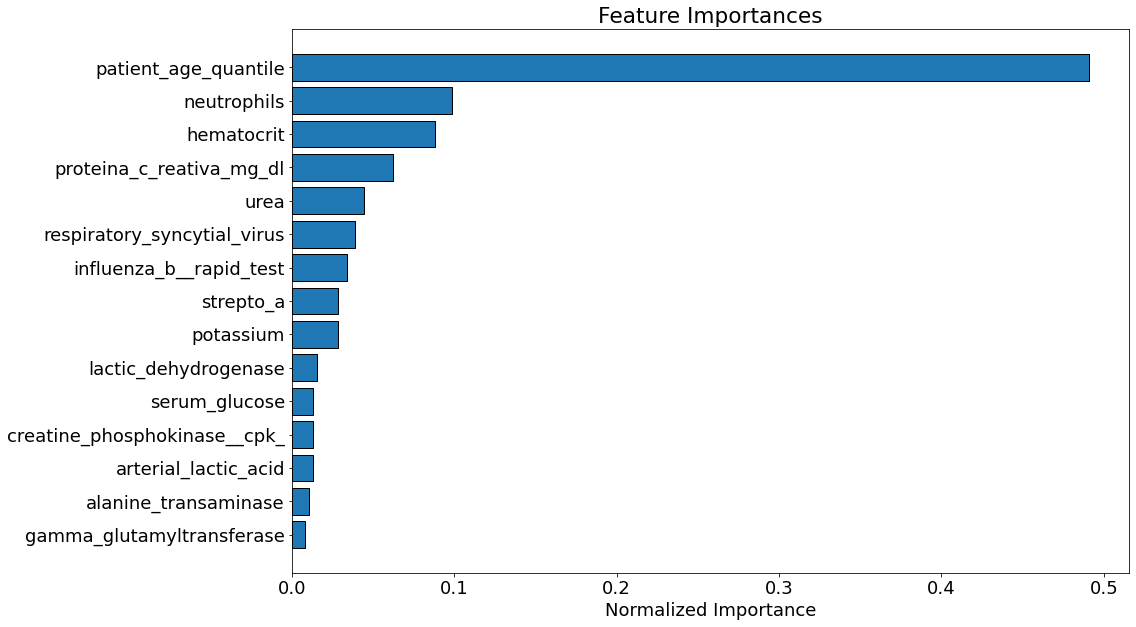

9 features required for 0.90 of cumulative importance


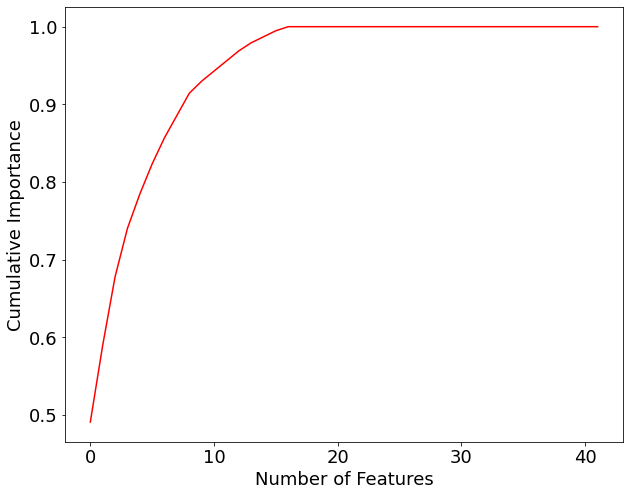

In [36]:
def plot_feature_importances(df, threshold=0.9):
    plt.rcParams["font.size"] = 18
    
    # Sort features according to importance
    df = df.sort_values("importance", ascending = False).reset_index()
    
    # Normalize the feature 
    df["importance_normalized"] = df["importance"] / df["importance"].sum()
    
    df["cumulative_importance"] = np.cumsum(df["importance_normalized"])
    
    plt.figure(figsize = (15,10))
    ax=plt.subplot()
    
    # Need to reversed the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), df["importance_normalized"].head(15), align = "center", edgecolor="k")
    
    # set yticks & labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df["feature"].head(15))
    
    # plot labeling
    plt.xlabel("Normalized Importance");
    plt.title("Feature Importances")
    plt.show()    
    
    # Cumulative impoertance plot
    plt.figure(figsize=(10,8))
    plt.plot(list(range(len(df))), df["cumulative_importance"],"r-")
    plt.xlabel("Number of Features");
    plt.ylabel("Cumulative Importance");
    
    importance_index = np.min(np.where(df["cumulative_importance"] > threshold))
    print("%d features required for %0.2f of cumulative importance" % (importance_index + 1,threshold))
    
    return df
norm_fearure_importances = plot_feature_importances(feature_importances)

##### So we see from above many of features looks like 0 importance, therefore we can remove that features from the model with no effect on performance.

### Removing features

In [37]:
df_lgb = df_lgb.drop(columns = zero_features)
print("Dataset shape:", df_lgb.shape)

Dataset shape: (5644, 17)


### Now again we will run the model to see, if it identifies any more features with zero importance. we are reapting the model so have to be very careful with the identification code in funtion.

In [38]:
def identify_zero_importance_features(train, train_labels, iterations = 2):
    
    feature_importances = np.zeros(train.shape[1])
    
    model = lgb.LGBMClassifier(objective="binary", boosting_type="goss",n_estimators=10000, class_weight="balanced")
    
    for i in range (iterations):
        #spliting 
        train_features, valid_features, train_y, valid_y = train_test_split(train,
                                                                           train_labels, test_size=0.25, random_state=i)
    
        model.fit(train_features, train_y, early_stopping_rounds=100, eval_set=[(valid_features, valid_y)], eval_metric = "auc", verbose=200)
        
        feature_importances += model.feature_importances_ / iterations
        feature_importances = pd.DataFrame({"feature": list(train.columns),
                                            "importance": feature_importances}).sort_values("importance", 
                                                                                            ascending = False)

        zero_features = list(feature_importances[feature_importances["importance"] ==0.0]["feature"])
        
        print("\nThere are %d features with 0.0 importance" % len(zero_features))
        
        return zero_features, feature_importances

second_round_zero_features, feature_importances = identify_zero_importance_features(df_lgb,df_labels)


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.647125	valid_0's binary_logloss: 0.614034

There are 1 features with 0.0 importance


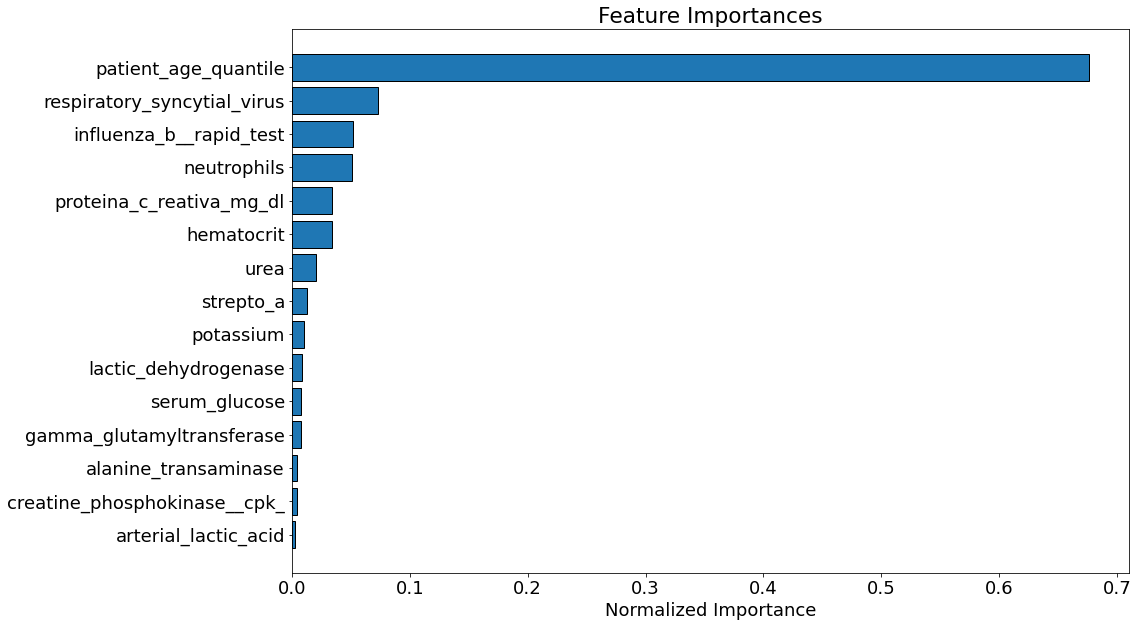

8 features required for 0.95 of cumulative importance


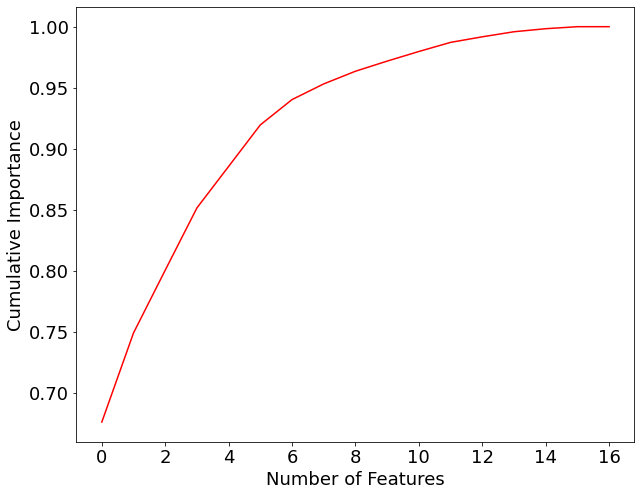

In [39]:
norm_feature_importances = plot_feature_importances(feature_importances, threshold=0.95)

##### Now we are going to remove that 1 more feature. if we want, its  totally depend on us its correlation value is  above from 0.9  

In [40]:
df_lgb = df_lgb.drop(columns = second_round_zero_features)
print("Datset shape:", df_lgb.shape)

Datset shape: (5644, 16)


In [41]:
threshold=0.95

features_to_keep = list(norm_feature_importances[norm_feature_importances["cumulative_importance"] < threshold]["feature"])
features_to_keep.append("patient_addmited_to_intensive_care_unit__1_yes__0_no_")
features_to_keep.append("patient_addmited_to_regular_ward__1_yes__0_no_")
features_to_keep.append("patient_addmited_to_semi_intensive_unit__1_yes__0_no_")
features_to_keep.append("patient_id")
features_to_keep.append("sars_cov_2_exam_result")

In [42]:
# New database
df_small = df_lgb_[features_to_keep]

## Modeling

In [43]:
train_df = df_small
features = list(train_df)
features.remove("patient_id")
features.remove("sars_cov_2_exam_result")
features.remove("patient_addmited_to_intensive_care_unit__1_yes__0_no_")
features.remove("patient_addmited_to_regular_ward__1_yes__0_no_")
features.remove("patient_addmited_to_semi_intensive_unit__1_yes__0_no_")
target = "sars_cov_2_exam_result"

In [44]:
### Confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues) :
    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(

classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [45]:
from sklearn.model_selection import StratifiedKFold
import  itertools
from scipy import interp
from sklearn.metrics import roc_curve, roc_auc_score,f1_score, auc,precision_recall_curve, accuracy_score, recall_score, precision_score

In [46]:
def gradient_boosting_model(params, fold, model="LGB", stack=False):
    print(str(model)+ " modeling..")
    start_time = timer(None)
    plt.rcParams["axes.grid"] = True
    nfold = 5
    skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=2020)
    oof = np.zeros(len(train_df))
    mean_fpr = np.linspace(0,1,100)
    cms=[]
    tprs=[]
    aucs= []
    y_real=[]
    y_proba=[]
    recalls=[]
    roc_aucs=[]
    f1_scores=[]
    accuracies=[]
    precisions=[]
    feature_importance_df = pd.DataFrame()
    
    i=1
    
    for train_idx, valid_idx, in skf.split(train_df, train_df["sars_cov_2_exam_result"].values):
        print("\nfold {}".format(i))
        
        if model == "XGB":
            trn_data = xgb.DMatrix(train_df.iloc[train_idx][features],label=train_df.iloc[train_idx][target].values)
            val_data = xgb.DMatrix(train_df.iloc[valid_idx][features],label=train_df.iloc[valid_idx][target].values)
            watchlist = [(trn_data, "train"), (val_data,"valid")]
            clf = xgb.train(params, dtrain = trn_data, evals= watchlist, early_stopping_rounds=100, maximize=True, verbose_eval=100)
            oof[valid_idx] = clf.predict(val_data, ntree_limit=clf.best_ntree_limit)
        
        # scores
        roc_aucs.append(roc_auc_score(train_df.iloc[valid_idx][target].values, oof[valid_idx]))
        accuracies.append(accuracy_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        recalls.append(recall_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        precisions.append(precision_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        f1_scores.append(f1_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        
        # Roc curve by folds
        f = plt.figure(1)
        fpr, tpr, t = roc_curve(train_df.iloc[valid_idx][target].values, oof[valid_idx])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc (fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label="ROC fold %d (AUC = %0.4f)" % (i,roc_auc))

# Precision recall by folds
        g = plt.figure(2)
        precision, recall, _ = precision_recall_curve(train_df.iloc[valid_idx][target].values, oof[valid_idx])
        y_real.append(train_df.iloc[valid_idx][target].values)
        y_proba.append(oof[valid_idx])
        plt.plot(recall, precision, lw=2, alpha=0.3, label="P|R fold %d" % (i))
        i = i+1
        

# confusion matrix byh folds
        cms.append(confusion_matrix(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
    
    

# Metrics 
    print("\nCV roc score   : {0:.4f}, std: {1:.4f}.".format(np.mean(roc_aucs), np.std(roc_aucs)),
          "\nCV accuracy score  : {0:.4f}, std: {1:.4f}.".format(np.mean(accuracies), np.std(accuracies)),
          "\nCV precision score : {0:.4f}, std: {1:.4f}.".format(np.mean(precisions), np.std(precisions)),
          "\nCV recall score : {0:.4f}, std: {1:.4f}.".format(np.mean(recall), np.std(recalls)),
          "\n f1 score : {0:.4f}, std: {1:.4f}.".format(np.mean(f1_scores), np.std(f1_scores)))

# Roc plt
    f = plt.figure(1)
    plt.plot([0,1],[0,1], linestyle = "--", lw = 2, color = "grey")
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color="blue", label=r"Mean ROC (AUC = %0.4f)" % (np.mean(roc_aucs)), lw=2, alpha=1)
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(str(model)+"ROC curve by folds")
    plt.legend(loc="lower right")
    
    # PR plt
    g=plt.figure(2)
    plt.plot([0,1],[1,0], linestyle = "--", lw=2, color="grey")
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    plt.plot(recall, precision, color="blue", label=r"Mean P|R")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(str(model)+" P|R curve by folds")
    plt.legend(loc="lower left")
    
    # confusion matrix
    plt.rcParams["axes.grid"] = False
    cm = np.average(cms, axis=0)
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names, title= str(model).title()+"Confusion matrix [averaged/folds]")
    
    # Feature importance plt
    if model != "XGB":
        cols = (feature_importance_df[["Feature", "importance"]].groupby("Feature").mean().sort_values(by="importance",
                                                                                                     ascending=False)[:30].index)
        best_features = features_importance_df.loc[features_importance_df.Features.siin(cols)]
        plt.figure(figsize=(10,10))
        sns.barplot(x="imjportance", y="Features", data=best_features.sort_values(by="importance, ascending=False"), edgecolor=("white"), linewidth=2, palette="rocket")
        plt.title(str(model)+" Features importancce (avveraged/folds)", fontsize=20)
        plt.tight_layout()
        
    timer(start_time)

In [47]:
# timer
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin, tsec = divmod(temp_sec, 60)
        print("Time taken for Modeling: %i hours %i minutes and %s seconds." % (thour, tmin, round(tsec,2)))

## XGBoost

In [48]:
import xgboost as xgb
param_xgb = {"n_jobs" : -1, "n_estimators" : 500, "seed" : 1919, "random_state":2020,"eval_metric": "auc"}

XGB modeling..

fold 1
[00:30:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.66875	valid-auc:0.61409
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 100 rounds.
[9]	train-auc:0.71374	valid-auc:0.63543

fold 2
[00:30:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open a

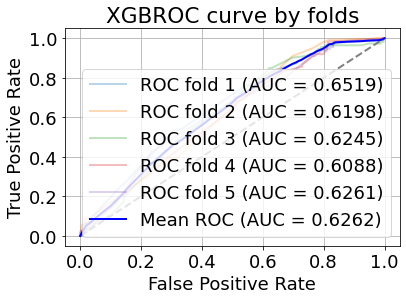

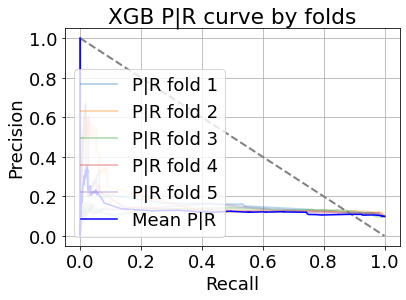

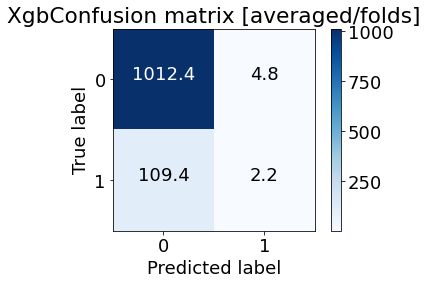

In [49]:
gradient_boosting_model(param_xgb, 5, "XGB")

In [50]:
X = train_df.drop("patient_id", axis=1)
X = X.drop(["sars_cov_2_exam_result","patient_addmited_to_intensive_care_unit__1_yes__0_no_",
                  "patient_addmited_to_regular_ward__1_yes__0_no_","patient_addmited_to_semi_intensive_unit__1_yes__0_no_"],axis=1)
 
target = train_df["sars_cov_2_exam_result"]

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=2020,stratify=target)

In [51]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import math
from sklearn import metrics

## LGBM Regressor

In [52]:
lgbm = LGBMRegressor(boosting_type = "gbdt", objective="binary", metric="AUC",boost_from_average="false",learning_rate=0.0045, num_leaves=491, max_depth=20, min_child_weight=0.035,
                  feature_fraction=0.38, bagging_fraction=0.42,min_data_in_leaf=100,max_bin=255,importance_typer="split",reg_alpha=0.4,reg_lambda=0.65,bagging_seed=2020, random_state=2020,
                  verbosity=-1,subsample=0.85,colsample_bytree=0.8,min_child_samples=79)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

df_lgbm = pd.DataFrame({"actual":y_test, "pred":lgbm_pred})

error = math.sqrt(metrics.mean_squared_error(y_test,lgbm_pred))

print("Model Performance")

print(df_lgbm.head())
print("R^2-score:- {}".format(lgbm.score(X_test,y_test)))
print("RMSE: {}".format(error))


Model Performance
      actual      pred
4080       0  0.356041
1731       0  0.340627
4595       0  0.340627
5486       0  0.356041
2669       0  0.354131
R^2-score:- -0.7323165595406864
RMSE: 0.39222707612859026


## Cat Boost Regressor

In [53]:
cbr = CatBoostRegressor(learning_rate=0.1,bagging_temperature=0.1,
                       depth=12,max_bin=255,iterations=100, loss_function="Logloss",
                       objective="RMSE",eval_metric="AUC",bootstrap_type="Bayesian",random_seed=2020,early_stopping_rounds=10)
cbr.fit(X_train, y_train)
cbr_pred = cbr.predict(X_test)

df_cbr = pd.DataFrame({"actual":y_test, "pred":cbr_pred})
error = math.sqrt(metrics.mean_squared_error(y_test,cbr_pred))

print("Model Performance")
print(df_cbr.head())
print("R^2-score:- {}".format(cbr.score(X_test, y_test)))
print("RMSE: {}".format(error))

0:	total: 184ms	remaining: 18.2s
1:	total: 252ms	remaining: 12.3s
2:	total: 299ms	remaining: 9.66s
3:	total: 344ms	remaining: 8.25s
4:	total: 389ms	remaining: 7.4s
5:	total: 436ms	remaining: 6.83s
6:	total: 480ms	remaining: 6.38s
7:	total: 524ms	remaining: 6.03s
8:	total: 570ms	remaining: 5.76s
9:	total: 624ms	remaining: 5.62s
10:	total: 676ms	remaining: 5.47s
11:	total: 729ms	remaining: 5.34s
12:	total: 787ms	remaining: 5.27s
13:	total: 788ms	remaining: 4.84s
14:	total: 842ms	remaining: 4.77s
15:	total: 902ms	remaining: 4.73s
16:	total: 903ms	remaining: 4.41s
17:	total: 961ms	remaining: 4.38s
18:	total: 1.01s	remaining: 4.29s
19:	total: 1.05s	remaining: 4.21s
20:	total: 1.11s	remaining: 4.16s
21:	total: 1.11s	remaining: 3.92s
22:	total: 1.11s	remaining: 3.71s
23:	total: 1.15s	remaining: 3.66s
24:	total: 1.16s	remaining: 3.47s
25:	total: 1.21s	remaining: 3.45s
26:	total: 1.26s	remaining: 3.42s
27:	total: 1.32s	remaining: 3.38s
28:	total: 1.37s	remaining: 3.36s
29:	total: 1.43s	remainin

## Ensemble Models

## Random Forest Classiifer

In [54]:
before = 0
n_cores = 4

rf = RandomForestClassifier(n_jobs=n_cores,n_estimators=1000,max_depth=50,max_features="sqrt", random_state=1000)

clf= rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

df_rf = pd.DataFrame({"actual":y_test, "pred": rf_pred})

error = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print("Model Performances")
print("\nAccuracy score: " + str(accuracy_score(y_test,rf_pred)))
print("\nR^2-score:- {}".format(rf.score(X_test, y_test)))
print("\nRMSE: {}". format(error))
print(df_rf.head())
print("\nConfusion_matrix: \n" + str(confusion_matrix(y_test,rf_pred)))
print("\nClassification report: \n" + str(classification_report(y_test,rf_pred)))

Model Performances

Accuracy score: 0.9014883061658399

R^2-score:- 0.9014883061658399

RMSE: 0.3138657258035037
      actual  pred
4080       0     0
1731       0     0
4595       0     0
5486       0     0
2669       0     0

Confusion_matrix: 
[[1271    1]
 [ 138    1]]

Classification report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1272
           1       0.50      0.01      0.01       139

    accuracy                           0.90      1411
   macro avg       0.70      0.50      0.48      1411
weighted avg       0.86      0.90      0.86      1411



## AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=21, learning_rate=1).fit(X_train,y_train)
ada_pred = ada.predict(X_test)

df_ada = pd.DataFrame({"actual": y_test, "pred":ada_pred})
error = math.sqrt(metrics.mean_squared_error(y_test,ada_pred))
print("Model Performance")
print("\nAccuracy acore: " +str(accuracy_score(y_test,ada_pred)))
print("\nR^2-score:- {}".format(ada.score(X_test,ada_pred)))
print("\nRMSE: {}".format(error))
print(df_ada.head())
print("\nConfusion_matrix: \n" + str(confusion_matrix(y_test,ada_pred)))
print("\nClassification report: \n" +str(classification_report(y_test,ada_pred)))

Model Performance

Accuracy acore: 0.9007795889440113

R^2-score:- 1.0

RMSE: 0.31499271587766703
      actual  pred
4080       0     0
1731       0     0
4595       0     0
5486       0     0
2669       0     0

Confusion_matrix: 
[[1271    1]
 [ 139    0]]

Classification report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1272
           1       0.00      0.00      0.00       139

    accuracy                           0.90      1411
   macro avg       0.45      0.50      0.47      1411
weighted avg       0.81      0.90      0.85      1411



## AdaBoost with base estimator

In [56]:
from sklearn.svm import SVC
svc=SVC(probability=True, kernel="linear")

ada1 = AdaBoostClassifier(n_estimators=10, base_estimator=svc,algorithm="SAMME").fit(X_train,y_train)
ada1_pred = ada.predict(X_test)
error = math.sqrt(metrics.mean_squared_error(y_test,ada1_pred))

df_ada1 = pd.DataFrame({"actual":y_test, "pred":ada1_pred})
print("Model Performance")
print("\nAccuracy score: "+ str(accuracy_score(y_test,ada1_pred)))
print("\nR^2-score:- {}".format(ada1.score(X_test, y_test)))
print("\nRMSE: {}". format(error))
print("\nConfusion_matrix: \n" + str(confusion_matrix(y_test,ada1_pred)))
print("\nClassification report: \n" + str(classification_report(y_test,ada1_pred)))

Model Performance

Accuracy score: 0.9007795889440113

R^2-score:- 0.9014883061658399

RMSE: 0.31499271587766703

Confusion_matrix: 
[[1271    1]
 [ 139    0]]

Classification report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1272
           1       0.00      0.00      0.00       139

    accuracy                           0.90      1411
   macro avg       0.45      0.50      0.47      1411
weighted avg       0.81      0.90      0.85      1411



## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=11).fit(X_train,y_train)
lr_pred = lr.predict(X_test)

df_lr = pd.DataFrame({"actual":y_test, "pred": lr_pred})

error = math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
print(df_lr.head())
print("\nAccuracy score:" + str(accuracy_score(y_test,lr_pred)))
print("\nR^2-score:- {}".format(lr.score(X_test,y_test)))
print("\nRMSE: {}". format(error))
print("\nConfusion_matrix: \n" +str(confusion_matrix(y_test,lr_pred)))
print("\nClassification report: \n" +str(classification_report(y_test,lr_pred)))

      actual  pred
4080       0     0
1731       0     0
4595       0     0
5486       0     0
2669       0     0

Accuracy score:0.9014883061658399

R^2-score:- 0.9014883061658399

RMSE: 0.3138657258035037

Confusion_matrix: 
[[1272    0]
 [ 139    0]]

Classification report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1272
           1       0.00      0.00      0.00       139

    accuracy                           0.90      1411
   macro avg       0.45      0.50      0.47      1411
weighted avg       0.81      0.90      0.85      1411



##### Ploltting the heatmap for Logistic regression

AxesSubplot(0.125,0.808774;0.62x0.0712264)


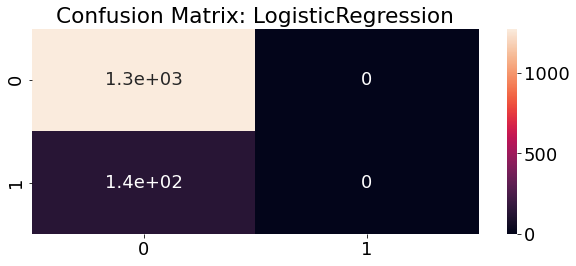

In [58]:
cm=confusion_matrix(y_test,lr_pred)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix: LogisticRegression")
print(sns.heatmap(cm,annot=True))

In [59]:
print("Actual COVID19 cases:\n",y_test)
print("Predicted COVID19 cases:\n",rf_pred)

Actual COVID19 cases:
 4080    0
1731    0
4595    0
5486    0
2669    0
       ..
5625    0
155     0
1319    0
1332    0
4567    0
Name: sars_cov_2_exam_result, Length: 1411, dtype: int64
Predicted COVID19 cases:
 [0 0 0 ... 0 0 0]


### Saving Model

In [60]:
import joblib
joblib.dump(rf,"Predictions_of_COVID19.obj")

['Predictions_of_COVID19.obj']

## Task 1 Conclusion:
##### Random Forest classifier model is the best model out of all models tested with around 91% of accuracy for predicting the confirmed cases of COVID19 based on the result of SARS-Cov-2

# Task 2
##  Now we going to predict the admission to general ward,semi-intensive unit or intensive care unit.

##### Again we will upload the dataset for Task 2, but in Task 2 we will approach differently as compared to Task 1  

In [61]:
df1 = pd.read_csv("Brazil_COVID-19_Hospital.csv", header=0, encoding="unicode_escape")
df1

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0            NaN        NaN                    NaN  ...   
1      -0.022340  -0.517413               0.010677  ...   
2            NaN        NaN                    NaN  ...   
3            NaN        NaN                    NaN  ...   
4            NaN        NaN                    NaN  ...   
...          ...        ...                    ...  ...   
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643    0.541564  -0.906829              -0.325903  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                                     

### Already we know that this data having some missing values, so we will start treating the missing values

In [62]:
df1.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

##### checking for duplicated data present in dataset

In [63]:
df1.duplicated().sum()

0

In [64]:
cat_data = df1.select_dtypes(include="object")
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Patient ID                   5644 non-null   object
 1   SARS-Cov-2 exam result       5644 non-null   object
 2   Respiratory Syncytial Virus  1354 non-null   object
 3   Influenza A                  1354 non-null   object
 4   Influenza B                  1354 non-null   object
 5   Parainfluenza 1              1352 non-null   object
 6   CoronavirusNL63              1352 non-null   object
 7   Rhinovirus/Enterovirus       1352 non-null   object
 8   Coronavirus HKU1             1352 non-null   object
 9   Parainfluenza 3              1352 non-null   object
 10  Chlamydophila pneumoniae     1352 non-null   object
 11  Adenovirus                   1352 non-null   object
 12  Parainfluenza 4              1352 non-null   object
 13  Coronavirus229E              1352

In [65]:
cat_data.isnull().sum()

Patient ID                        0
SARS-Cov-2 exam result            0
Respiratory Syncytial Virus    4290
Influenza A                    4290
Influenza B                    4290
Parainfluenza 1                4292
CoronavirusNL63                4292
Rhinovirus/Enterovirus         4292
Coronavirus HKU1               4292
Parainfluenza 3                4292
Chlamydophila pneumoniae       4292
Adenovirus                     4292
Parainfluenza 4                4292
Coronavirus229E                4292
CoronavirusOC43                4292
Inf A H1N1 2009                4292
Bordetella pertussis           4292
Metapneumovirus                4292
Parainfluenza 2                4292
Influenza B, rapid test        4824
Influenza A, rapid test        4824
Strepto A                      5312
Urine - Esterase               5584
Urine - Aspect                 5574
Urine - pH                     5574
Urine - Hemoglobin             5574
Urine - Bile pigments          5574
Urine - Ketone Bodies       

##### From above we can say 80 to 90 percent of data is missing in some attributes, we will put "Missing" as a value.

In [66]:
for columns in cat_data:
    print("Columns Name:", columns)
    df1[columns].fillna("Missing",inplace=True)
    print(df1[columns].isnull().sum())
    print("\n")

Columns Name: Patient ID
0


Columns Name: SARS-Cov-2 exam result
0


Columns Name: Respiratory Syncytial Virus
0


Columns Name: Influenza A
0


Columns Name: Influenza B
0


Columns Name: Parainfluenza 1
0


Columns Name: CoronavirusNL63
0


Columns Name: Rhinovirus/Enterovirus
0


Columns Name: Coronavirus HKU1
0


Columns Name: Parainfluenza 3
0


Columns Name: Chlamydophila pneumoniae
0


Columns Name: Adenovirus
0


Columns Name: Parainfluenza 4
0


Columns Name: Coronavirus229E
0


Columns Name: CoronavirusOC43
0


Columns Name: Inf A H1N1 2009
0


Columns Name: Bordetella pertussis
0


Columns Name: Metapneumovirus
0


Columns Name: Parainfluenza 2
0


Columns Name: Influenza B, rapid test
0


Columns Name: Influenza A, rapid test
0


Columns Name: Strepto A
0


Columns Name: Urine - Esterase
0


Columns Name: Urine - Aspect
0


Columns Name: Urine - pH
0


Columns Name: Urine - Hemoglobin
0


Columns Name: Urine - Bile pigments
0


Columns Name: Urine - Ketone Bodies
0


Colum

## Now we will convert all categorical data intop numerical data  using Label Encoder

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for columns in cat_data:
    df1[columns]=le.fit_transform(df1[columns])

In [68]:
# Checking the data after converting
for columns in cat_data:
    print("Column Name:", columns)
    print(df1[columns].value_counts())
    print("\n")
    

Column Name: Patient ID
2047    1
469     1
4715    1
2668    1
621     1
       ..
5352    1
1258    1
3307    1
5356    1
0       1
Name: Patient ID, Length: 5644, dtype: int64


Column Name: SARS-Cov-2 exam result
0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64


Column Name: Respiratory Syncytial Virus
0    4290
2    1302
1      52
Name: Respiratory Syncytial Virus, dtype: int64


Column Name: Influenza A
0    4290
2    1336
1      18
Name: Influenza A, dtype: int64


Column Name: Influenza B
0    4290
2    1277
1      77
Name: Influenza B, dtype: int64


Column Name: Parainfluenza 1
0    4292
2    1349
1       3
Name: Parainfluenza 1, dtype: int64


Column Name: CoronavirusNL63
0    4292
2    1307
1      45
Name: CoronavirusNL63, dtype: int64


Column Name: Rhinovirus/Enterovirus
0    4292
2     973
1     379
Name: Rhinovirus/Enterovirus, dtype: int64


Column Name: Coronavirus HKU1
0    4292
2    1332
1      20
Name: Coronavirus HKU1, dtype: int64


Column Name: Pa

##### Now we will see the attributes whose data type is int

In [69]:
int_data = df1.select_dtypes(include="int64")
int_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype
---  ------                                                 --------------  -----
 0   Patient age quantile                                   5644 non-null   int64
 1   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64
 2   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64
 3   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64
dtypes: int64(4)
memory usage: 176.5 KB


In [70]:
float_data = df1.select_dtypes(include="float")
float_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 70 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Hematocrit                                        603 non-null    float64
 1   Hemoglobin                                        603 non-null    float64
 2   Platelets                                         602 non-null    float64
 3   Mean platelet volume                              599 non-null    float64
 4   Red blood Cells                                   602 non-null    float64
 5   Lymphocytes                                       602 non-null    float64
 6   Mean corpuscular hemoglobin concentration (MCHC)  602 non-null    float64
 7   Leukocytes                                        602 non-null    float64
 8   Basophils                                         602 non-null    float64
 9   Mean corpuscular he

##### we have in 4 int columns & 29 float columns. Now we will check for null values in float values

In [71]:
float_data.isnull().sum()

Hematocrit                            5041
Hemoglobin                            5041
Platelets                             5042
Mean platelet volume                  5045
Red blood Cells                       5042
                                      ... 
HCO3 (arterial blood gas analysis)    5617
pO2 (arterial blood gas analysis)     5617
Arteiral Fio2                         5624
Phosphor                              5624
ctO2 (arterial blood gas analysis)    5617
Length: 70, dtype: int64

In [72]:
for columns in float_data:
    print("Columns Name:", columns)
    df1[columns].fillna(0.0, inplace=True)
    print(df1[columns].isnull().sum())
    print("\n")

Columns Name: Hematocrit
0


Columns Name: Hemoglobin
0


Columns Name: Platelets
0


Columns Name: Mean platelet volume 
0


Columns Name: Red blood Cells
0


Columns Name: Lymphocytes
0


Columns Name: Mean corpuscular hemoglobin concentration (MCHC)
0


Columns Name: Leukocytes
0


Columns Name: Basophils
0


Columns Name: Mean corpuscular hemoglobin (MCH)
0


Columns Name: Eosinophils
0


Columns Name: Mean corpuscular volume (MCV)
0


Columns Name: Monocytes
0


Columns Name: Red blood cell distribution width (RDW)
0


Columns Name: Serum Glucose
0


Columns Name: Mycoplasma pneumoniae
0


Columns Name: Neutrophils
0


Columns Name: Urea
0


Columns Name: Proteina C reativa mg/dL
0


Columns Name: Creatinine
0


Columns Name: Potassium
0


Columns Name: Sodium
0


Columns Name: Alanine transaminase
0


Columns Name: Aspartate transaminase
0


Columns Name: Gamma-glutamyltransferase 
0


Columns Name: Total Bilirubin
0


Columns Name: Direct Bilirubin
0


Columns Name: Indirect Bil

In [73]:
# We check again full dataset after imputing all values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int32(37), int64(4)
memory usage: 4.0 MB


In [74]:
df1.isnull().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
                                                        ..
HCO3 (arterial blood gas analysis)                       0
pO2 (arterial blood gas analysis)                        0
Arteiral Fio2                                            0
Phosphor                                                 0
ctO2 (arterial blood gas analysis)                       0
Length: 111, dtype: int64

##### Data Preparing for our dataset for Model building

In [75]:
df1.shape

(5644, 111)

In [76]:
df1.head()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0        1588                    13                       0   
1         451                    17                       0   
2        3669                     8                       0   
3        5457                     5                       0   
4        4843                    15                       0   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0        0.000000   
1                                                  0        0.236515   
2                                                  0        0.000000   
3                                                  0        0.000000   
4                                                  0        0.000000   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0     0.00000   0.000000               0.000000  ...   
1    -0.02234  -0.517413               0.010677  ...   
2     0.00000   0.000000               0.000000  ...   
3     0.00000   0.000000               0.000000  ...   
4     0.00000   0.000000               0.000000  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   
2                                   0.0                                 0.0   
3                                   0.0                                 0.0   
4                                   0.0                                 0.0   

   Base excess (arterial blood gas analysis)  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               0.0                                      0.0   
1                               0.0                                      0.0   
2                               0.0                                      0.0   
3                               0.0                                      0.0   
4                               0.0                                      0.0   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 0.0                                0.0   
1                                 0.0                                0.0   
2                                 0.0                                0.0   
3                                 0.0                                0.0   
4                                 0.0                                0.0   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            0.0       0.0                                 0.0  
1            0.0       0.0                                 0.0  
2            0.0       0.0                                 0.0  
3            0.0       0.0                                 0.0  
4            0.0       0.0                                 0.0  

[5 rows x 111 columns]

##### we can drop patient ID columns from our data

In [77]:
df1_adm= df1.drop(columns=["Patient ID"],axis=1)
df1_adm.shape

(5644, 110)

In [78]:
df1_adm[["Patient addmited to regular ward (1=yes, 0=no)",
   "Patient addmited to semi-intensive unit (1=yes, 0=no)",
   "Patient addmited to intensive care unit (1=yes, 0=no)",]]

Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  
0                                                     0      
1                                                     0      
2                                                     0      
3                                                     0      
4                                                     0      
...                                                 ...      
5639                                                  0      
5640                                                  0      
5641                                                  0      
5642                                                  0      
5643                                                  0      

[5644 rows x 3 columns]

##### converting all 3 columns to object datatype & after that we will merge all 3 columns for our analysis

In [79]:
df1_adm["Patient addmited to regular ward (1=yes, 0=no)"] = df1_adm["Patient addmited to regular ward (1=yes, 0=no)"].astype(str)
df1_adm["Patient addmited to semi-intensive unit (1=yes, 0=no)"] = df1_adm["Patient addmited to semi-intensive unit (1=yes, 0=no)"].astype(str)
df1_adm["Patient addmited to intensive care unit (1=yes, 0=no)"] = df1_adm["Patient addmited to intensive care unit (1=yes, 0=no)"].astype(str)

In [80]:
df1_adm["admission to ward"] = df1_adm["Patient addmited to regular ward (1=yes, 0=no)"] + df1_adm["Patient addmited to semi-intensive unit (1=yes, 0=no)"] + df1_adm["Patient addmited to intensive care unit (1=yes, 0=no)"]

In [81]:
df1.shape

(5644, 111)

In [82]:
df1_adm["admission to ward"].head()

0    000
1    000
2    000
3    000
4    000
Name: admission to ward, dtype: object

##### from above we can say, our new target column is created and now we going to convert into numerical variable using label encoder

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1_adm["admission to ward"] = le.fit_transform(df1_adm["admission to ward"])

##### Let's see the data in new target column

In [84]:
print(df1_adm["admission to ward"].head())
print(df1_adm["admission to ward"].value_counts())

0    0
1    0
2    0
3    0
4    0
Name: admission to ward, dtype: int32
0    5474
3      79
2      50
1      41
Name: admission to ward, dtype: int64


##### Seperating target column from others, and also dropping all Patient addmited to any ward . Because we have already converted into one column, which is numerical.

In [85]:
dx = df1_adm.drop(columns=["Patient addmited to regular ward (1=yes, 0=no)", "Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)","admission to ward"],axis=1)
y = df1_adm[["admission to ward"]] # our target 
print(dx.shape)
print(y.shape)

(5644, 107)
(5644, 1)


##### Scaling the input variables

In [86]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler(feature_range=(0,5))
x=sc.fit_transform(dx)
x=pd.DataFrame(x, columns=dx.columns)

#### Applying PCA

In [87]:
from sklearn.decomposition import PCA
c=20
pca = PCA(n_components = c)
x = pca.fit_transform(x)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the Variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_))

Amount of variance: [7.49754174e+01 2.55513285e+00 2.12945899e+00 1.82300314e+00
 1.66213348e+00 2.99178712e-01 2.54956604e-01 1.75726994e-01
 1.52772539e-01 1.08237437e-01 1.00685778e-01 8.13577252e-02
 7.62858577e-02 7.18221031e-02 6.42446599e-02 6.18781462e-02
 6.08303288e-02 5.35314083e-02 4.96150798e-02 4.79447893e-02]
Sum of the Variance: 84.8
Percentage of variance: [8.75363324e-01 2.98320391e-02 2.48621531e-02 2.12841775e-02
 1.94059699e-02 3.49301253e-03 2.97670447e-03 2.05167202e-03
 1.78367100e-03 1.26370863e-03 1.17554047e-03 9.49878924e-04
 8.90663157e-04 8.38547315e-04 7.50078106e-04 7.22448259e-04
 7.10214636e-04 6.24997275e-04 5.79272816e-04 5.59771610e-04]
Sum of the percentage of variance: 0.9901178452197846


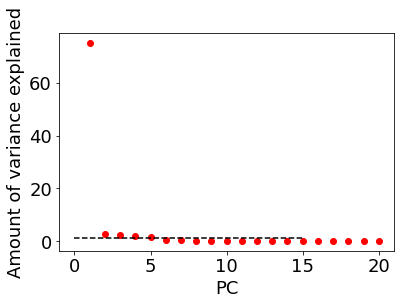

(5644, 20)


In [88]:
plt.scatter(np.arange(1,(c+1)),pca.explained_variance_, c="red")
plt.plot((0,15),(1,1),color = "black", linestyle="dashed")
plt.xlabel("PC")
plt.ylabel("Amount of variance explained")
plt.show()
print(x.shape)

## Again spliting the dataset

In [89]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=19)

print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape)

(4233, 20) (1411, 20)
(4233, 1) (1411, 1)


### Defining Model

In [90]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

lr=LogisticRegression()
sv=SVC()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
gd=GradientBoostingClassifier()


##### appending all models

In [91]:
models=[]
models.append(("LosgisticRgression",lr))
models.append(("SVC",sv))
models.append(("KNeighborsClassifier",knn))
models.append(("DecisionTreeClassifiedr",dtc))
models.append(("GaussianNB",gnb))

models.append(("RandomForestClassifier",rf))
models.append(("AdaBoostClassifier",ada))
models.append(("GradientBoostingClassifier",gd))

### Output of each models

In [92]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import cross_val_score 

Model=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print("==========",name,"==========")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print("\n")
    Ac=accuracy_score(y_test,pred)
    print("Accuracy score:",Ac)
    score.append(Ac*100)
    print("\n")
    sc=cross_val_score(model, x, y, cv=10, scoring="accuracy").mean()
    print("Cross val score: ", sc)
    cvs.append(sc*100)
    print("\n")
    cr=classification_report(y_test,pred)
    print("Classification Report:", cr)
    print("\n")
    cm=confusion_matrix(y_test,pred)
    print("Confusion matrix:\n",cm)
    print("\n")

========== LosgisticRgression ==========


LogisticRegression()


Accuracy score: 0.9709425939050319


Cross val score:  0.9697025042364903


Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.14      0.06      0.08        17

    accuracy                           0.97      1411
   macro avg       0.28      0.26      0.27      1411
weighted avg       0.95      0.97      0.96      1411



Confusion matrix:
 [[1369    1    1    1]
 [   7    0    1    3]
 [   8    1    0    2]
 [  14    1    1    1]]


========== SVC ==========


SVC()


Accuracy score: 0.9723600283486888


Cross val score:  0.9697021904223938


Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1372
           1       0.00      0.00      0

In [93]:
ovr_all_result= pd.DataFrame({"Model":Model, "Accuracy score":score, "Crosss_val_score":score})
ovr_all_result

Model  Accuracy score  Crosss_val_score
0          LosgisticRgression       97.094259         97.094259
1                         SVC       97.236003         97.236003
2        KNeighborsClassifier       97.306875         97.306875
3     DecisionTreeClassifiedr       96.527286         96.527286
4                  GaussianNB       86.250886         86.250886
5      RandomForestClassifier       97.094259         97.094259
6          AdaBoostClassifier       96.881644         96.881644
7  GradientBoostingClassifier       96.810773         96.810773

##### From over all result we can say Kneighbors Classifier is the best model with almost 98%  accuracy, so now we plot roc auc curve

##### Again we build model for Kneighbors Classifier for plotting roc auc score & heatmap.

Accuracy score: 0.9730687455705174
Cross_val_score: 0.9700568003514718
Confusion Matrix:
 [[1372    0    0    0]
 [   9    0    0    2]
 [  10    1    0    0]
 [  16    0    0    1]]
Classifiacetion report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.33      0.06      0.10        17

    accuracy                           0.97      1411
   macro avg       0.33      0.26      0.27      1411
weighted avg       0.95      0.97      0.96      1411

AxesSubplot(0.125,0.808774;0.62x0.0712264)


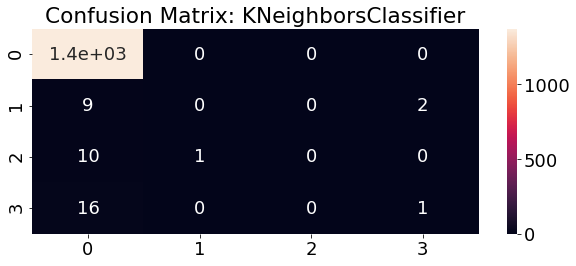

In [94]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=19)
knn=KNeighborsClassifier().fit(x_train,y_train)
knn_pred = knn.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,knn_pred))
      
print("Cross_val_score:",cross_val_score(knn,x,y,cv=10,scoring="accuracy").mean())
      
print("Confusion Matrix:\n", confusion_matrix(y_test,knn_pred))      
print("Classifiacetion report:\n", classification_report(y_test,knn_pred))
cm=confusion_matrix(y_test,knn_pred)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix: KNeighborsClassifier")
print(sns.heatmap(cm,annot=True))

##### Let's see the Actual values and Predicted values

In [95]:
print("Actual Patient addmited to ward:\n",y_test)
print("Predicted Patient addmited to ward:\n",knn_pred)

Actual Patient addmited to ward:
       admission to ward
3358                  0
1481                  0
63                    0
1398                  0
86                    2
...                 ...
2281                  0
155                   0
5308                  0
509                   0
4593                  0

[1411 rows x 1 columns]
Predicted Patient addmited to ward:
 [0 0 0 ... 0 0 0]


## Saving the Model

##### We are going to save the KNeighbors Classifier with almost 98% accuracy, using joblib to save the model

In [96]:
import joblib
joblib.dump(knn,"knn_Brazil_Covid19_admission to ward")

['knn_Brazil_Covid19_admission to ward']

## Task 2 Conclusion
##### So in this task AdaBoost Classifier Model is the best model among all the models, it is almost 98% accurate. In other words Ada model predict the correct result 98% for predicting the admission to any ward among confirmed COVID-19 cases.